In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import mrcfile
import torch

from tomoSegmentPipeline.utils.common import read_array, write_array
from tomoSegmentPipeline.utils import setup
from cryoS2Sdrop.dataloader import singleCET_dataset, singleCET_FourierDataset

from cryoS2Sdrop.analyze import *
from cryoS2Sdrop.deconvolution import tom_deconv_tomo

import tomopy.sim.project as proj
from tomopy.recon.algorithm import recon
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

PARENT_PATH = setup.PARENT_PATH

%matplotlib inline
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 80

def standardize(X):
    mean = X.mean()
    std = X.std()
    new_X = (X - mean) / std

    return new_X

def clip(X, low=0.0005, high=0.9995):
    # works with tensors =)
    return np.clip(X, np.quantile(X, low), np.quantile(X, high))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
p = os.path.join(PARENT_PATH, 'data/S2SDenoising/dummy_tomograms/shrec2021_model4_gtDummy.mrc') 
denoised = read_array(p)
denoised = -1*denoised
denoised = denoised - denoised.min()
denoised = standardize(clip(denoised))
denoised = scale(denoised)

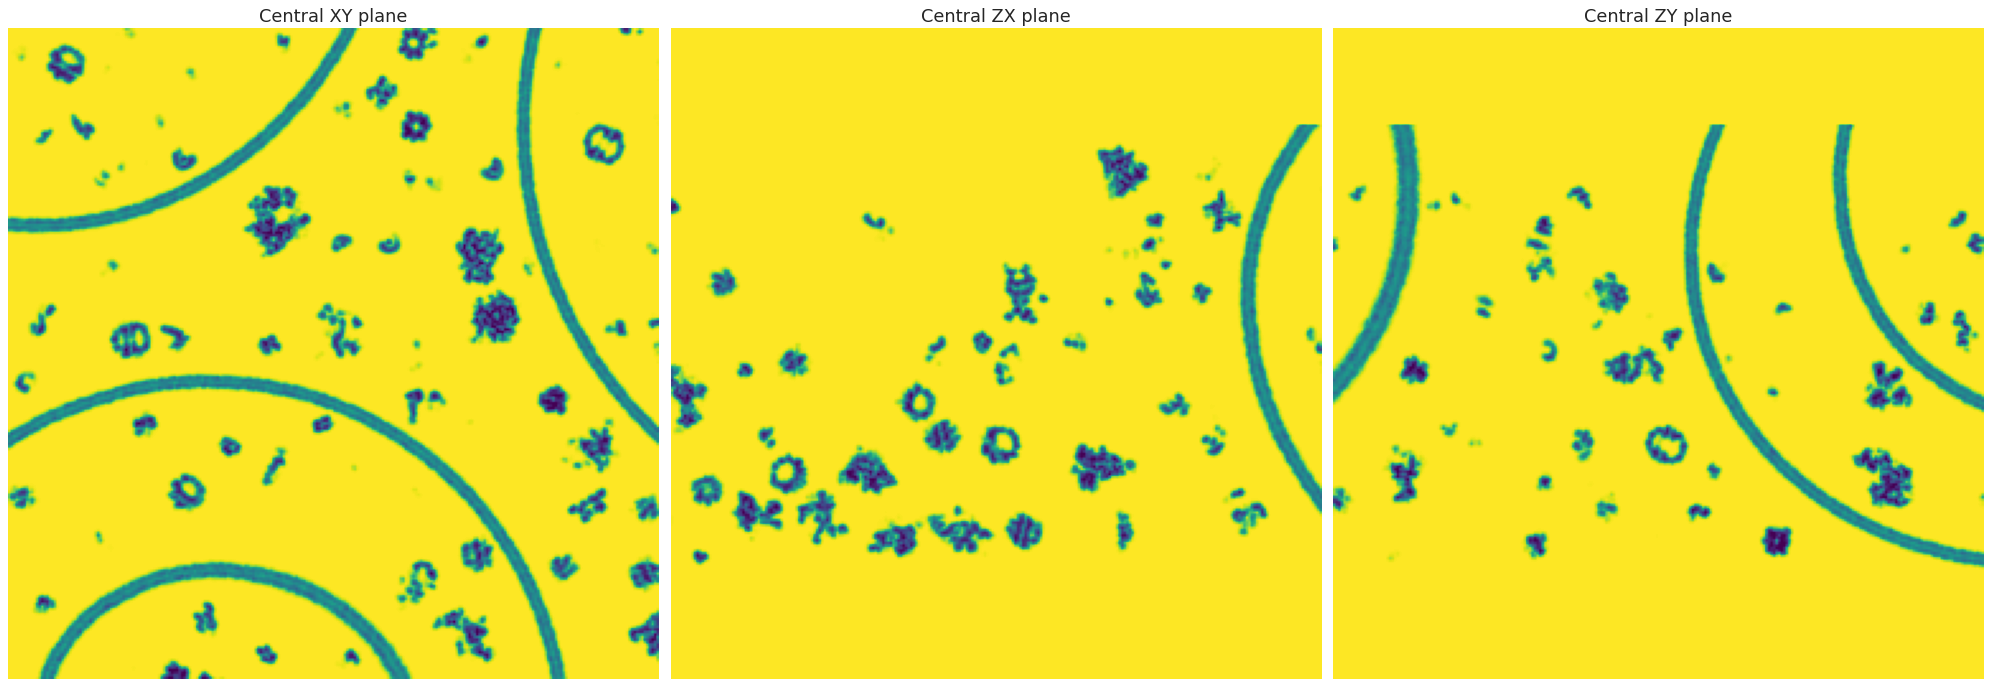

(<Figure size 2000x800 with 3 Axes>,
 array([<AxesSubplot:title={'center':'Central XY plane'}>,
        <AxesSubplot:title={'center':'Central ZX plane'}>,
        <AxesSubplot:title={'center':'Central ZY plane'}>], dtype=object))

In [32]:
plot_centralSlices(denoised, True)

In [33]:
p = os.path.join(PARENT_PATH, 'data/S2SDenoising/dummy_tomograms/shrec2021_model4_dummy.mrc') 
raw = read_array(p)
raw = standardize(clip(raw))
raw = scale(raw)

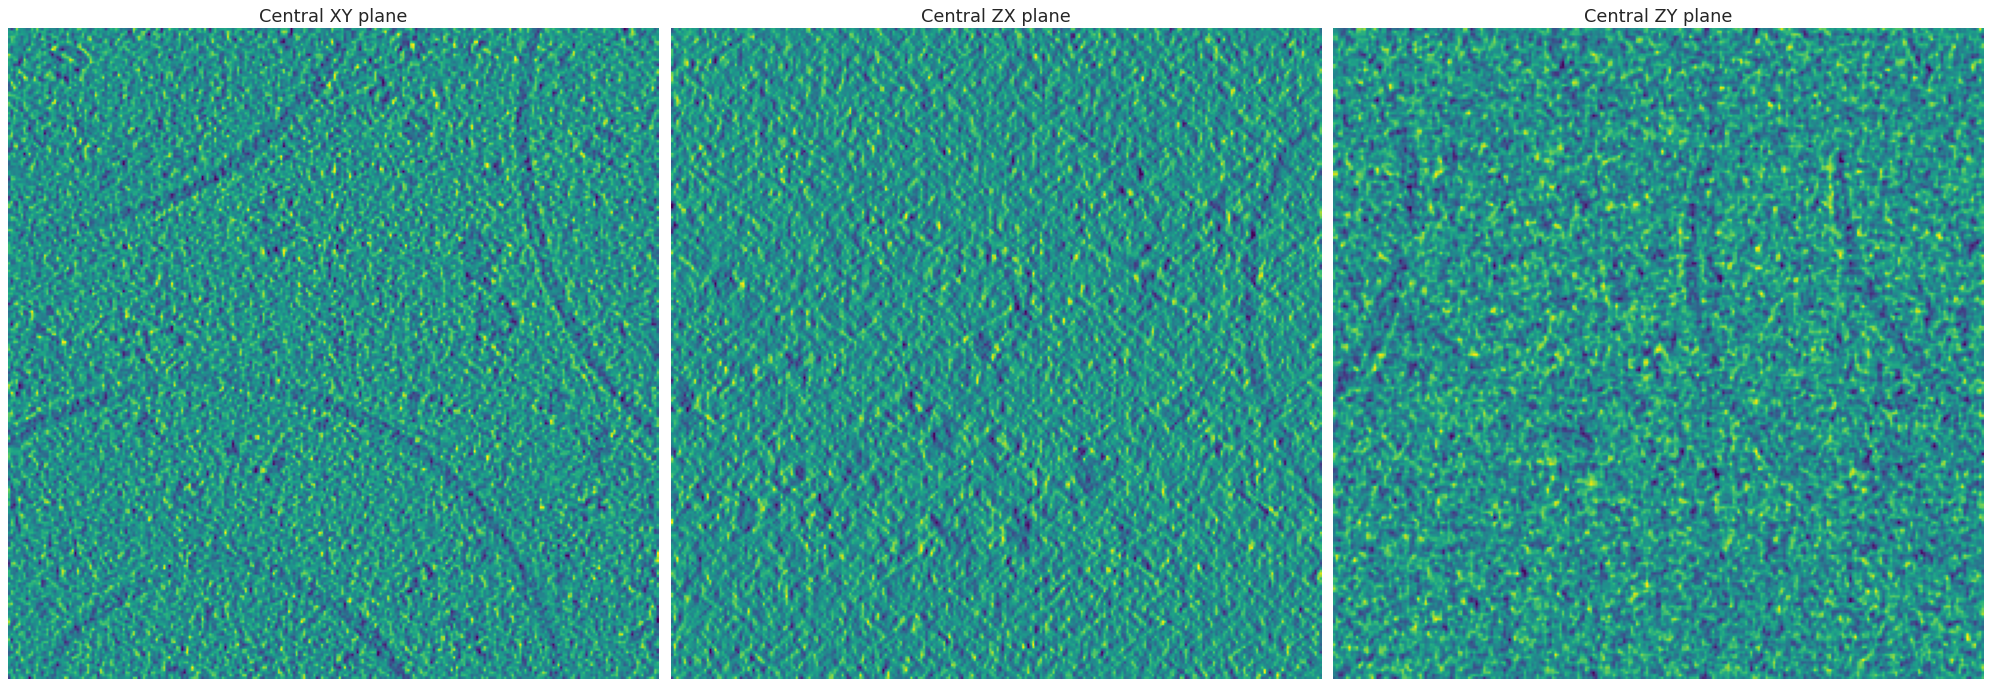

(<Figure size 2000x800 with 3 Axes>,
 array([<AxesSubplot:title={'center':'Central XY plane'}>,
        <AxesSubplot:title={'center':'Central ZX plane'}>,
        <AxesSubplot:title={'center':'Central ZY plane'}>], dtype=object))

In [34]:
plot_centralSlices(raw, True)

In [35]:
_ssim = ssim(torch.tensor(raw).unsqueeze(0).unsqueeze(0),
             torch.tensor(denoised).unsqueeze(0).unsqueeze(0), 
             data_range=1)

_psnr = peak_signal_noise_ratio(torch.tensor(raw).unsqueeze(0).unsqueeze(0),
             torch.tensor(denoised).unsqueeze(0).unsqueeze(0), 
             data_range=1)
_ssim, _psnr

(tensor(0.0866), tensor(6.2766))

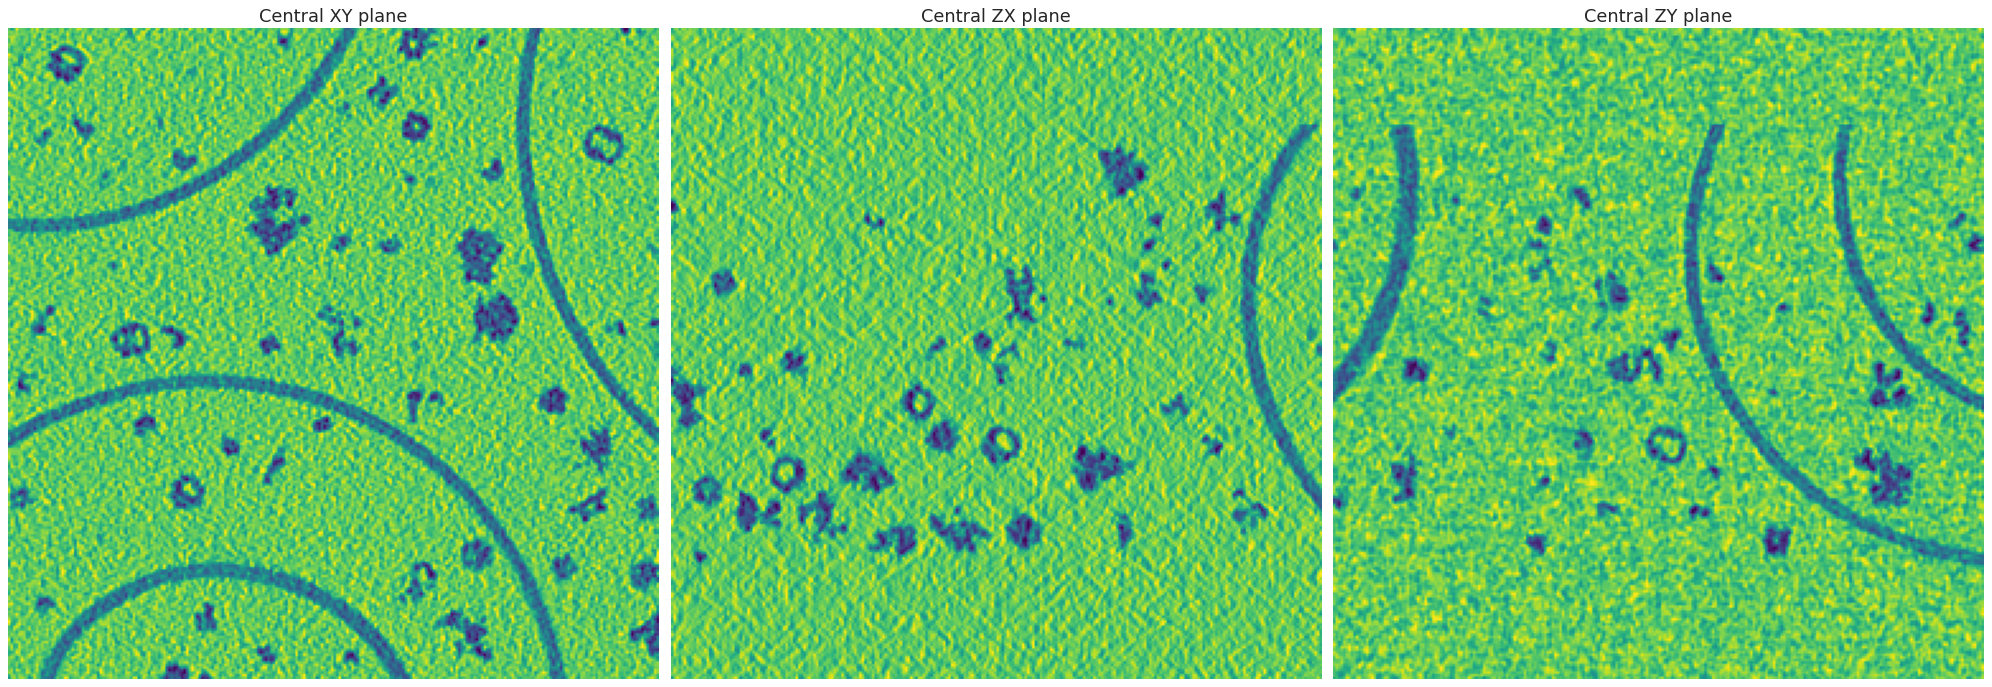

(<Figure size 2000x800 with 3 Axes>,
 array([<AxesSubplot:title={'center':'Central XY plane'}>,
        <AxesSubplot:title={'center':'Central ZX plane'}>,
        <AxesSubplot:title={'center':'Central ZY plane'}>], dtype=object))

In [20]:
plot_centralSlices(raw-denoised, True)

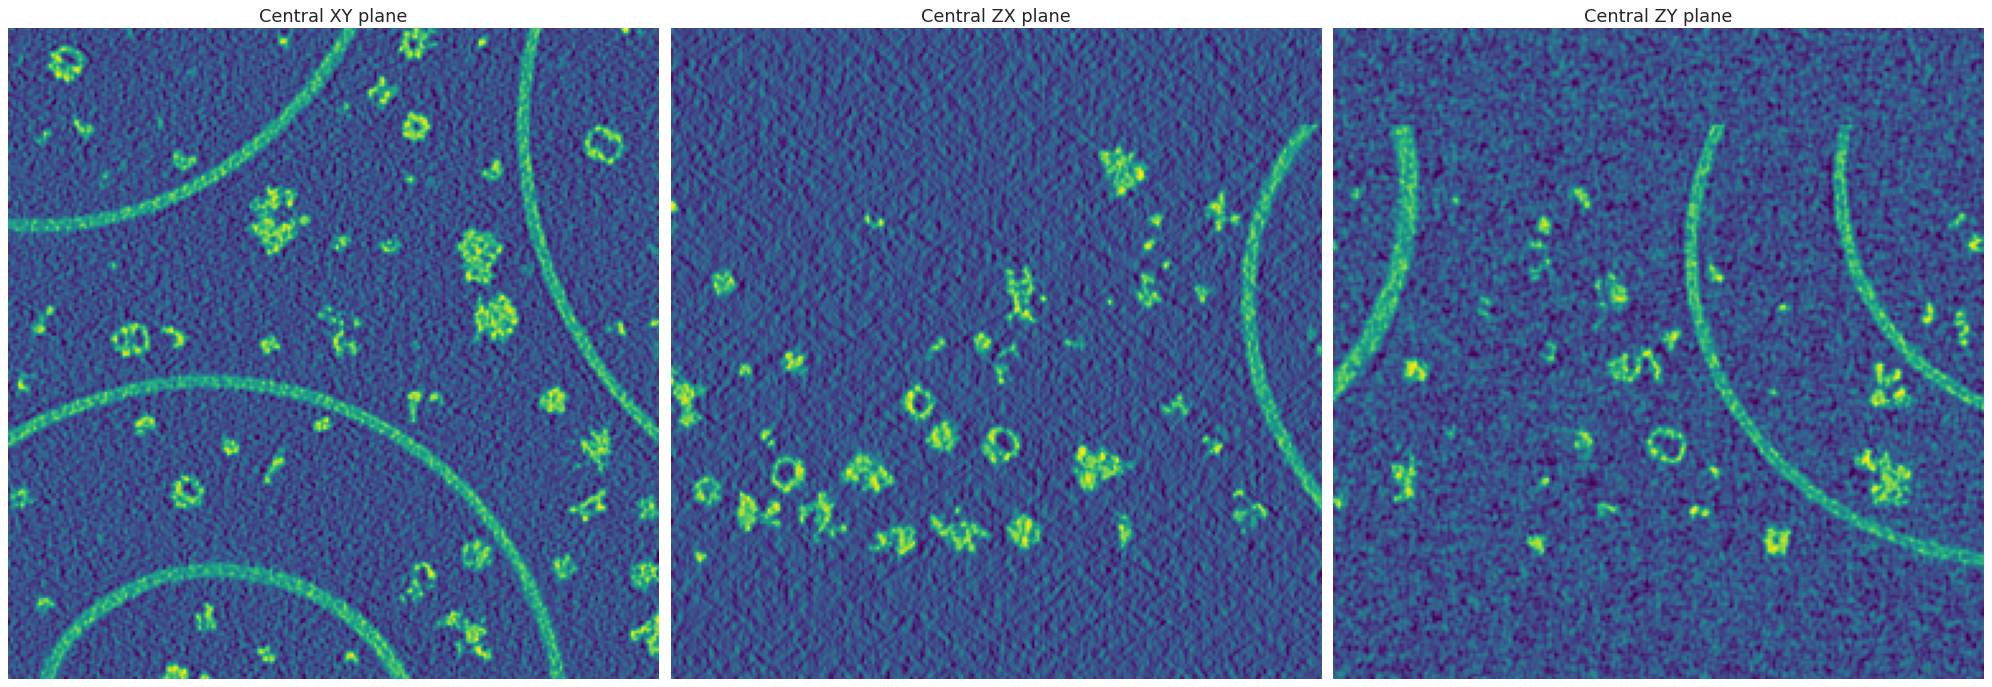

(<Figure size 2000x800 with 3 Axes>,
 array([<AxesSubplot:title={'center':'Central XY plane'}>,
        <AxesSubplot:title={'center':'Central ZX plane'}>,
        <AxesSubplot:title={'center':'Central ZY plane'}>], dtype=object))

In [21]:
plot_centralSlices(denoised-raw, True)